In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, gamma, chi2, gaussian_kde, t
import math

# If running on separate laptop/computer, this will need commenting out 
plt.style.use('pythonStyle')
import pythonStyle as ed

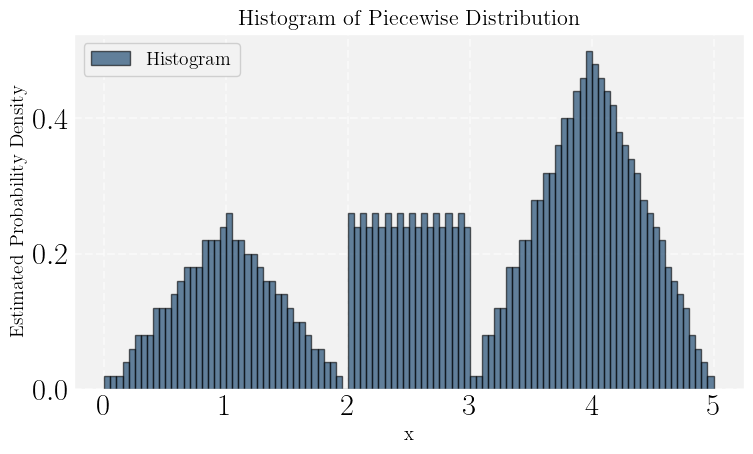

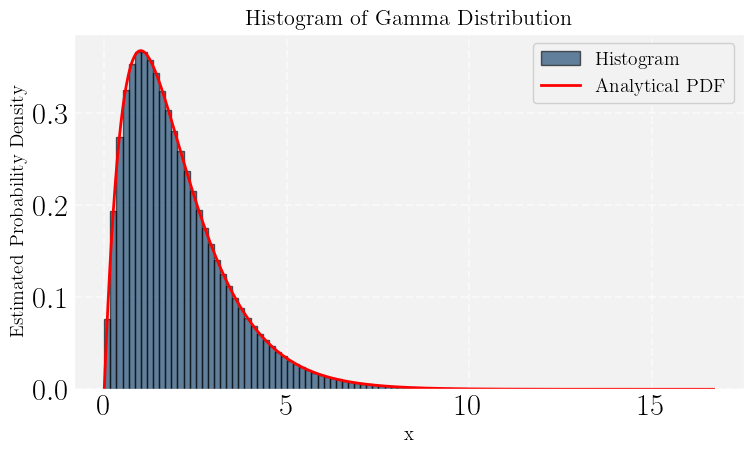

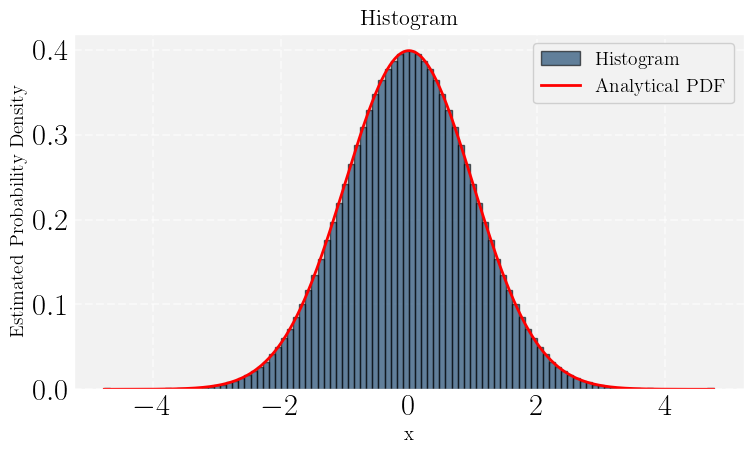

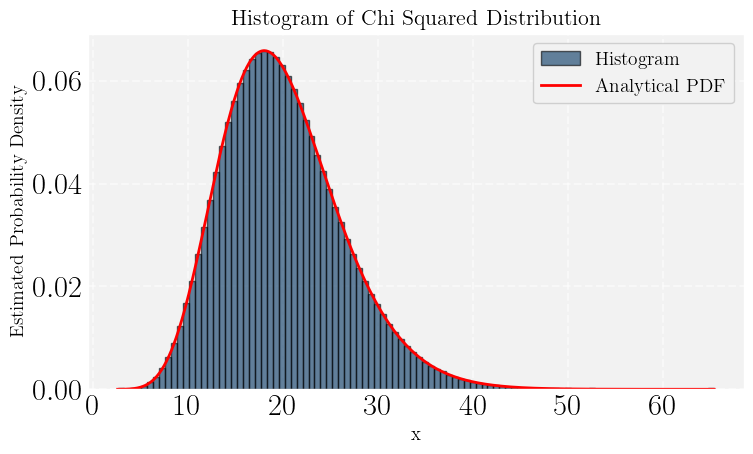

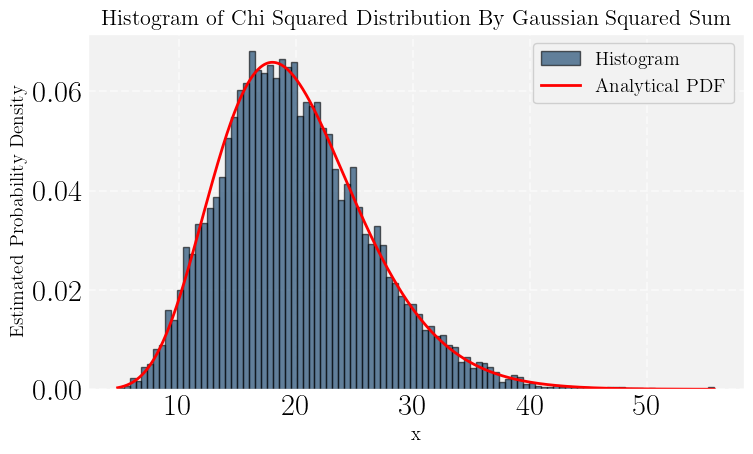

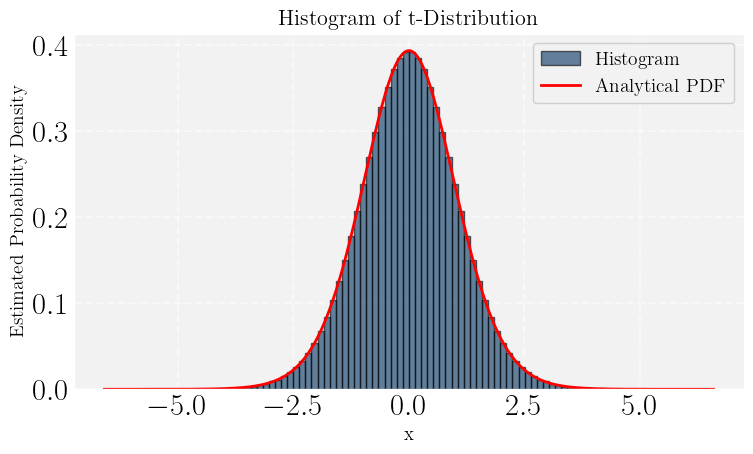

In [2]:
# ======================
# Distribution functions
# ======================

def calc_piecewiseDistribution(u):
    if (u >= 0 and u < (1/8)):
        x = math.sqrt(8*u)
    elif (u >= (1/8) and u < (1/4)):
        x = 2 - math.sqrt(2 - 8*u)
    elif (u >= (1/4) and u < (1/2)):
        x = 1 + 4*u
    elif (u >= (1/2) and u < (3/4)):
        x = 3 + math.sqrt(4*u - 2)
    elif (u >= (3/4) and u <= 1):
        x = 5 - math.sqrt(4 - 4*u)
    return x

def calc_gammaDistribution(u, shape=2.0, scale=1.0):
    return gamma.ppf(u, a=shape, scale=scale)

def calc_gaussianDistribution(u, mu=0.0, sigma=1.0):
    return norm.ppf(u, loc=mu, scale=sigma)

def calc_chiSquaredDistribution(u, df=20):
    return chi2.ppf(u, df)


def calc_chiSquaredDistributionGaussianSum(u, df=20): 
    z_samples = norm.ppf(np.random.uniform(0, 1, size=(df, len(u))))  # df × len(u) matrix of standard normals
    chi_squared_samples = np.sum(z_samples**2, axis=0)  # sum over df rows
    return chi_squared_samples

def calc_tDistribution(u, df=2):
    return t.ppf(u, df)

# ======================
# Plotting function
# ======================

def plot_histogram(data, bins=100, title='Histogram', xlabel='x', ylabel='Estimated Probability Density',
                   pdf_func=None, pdf_label='Analytical PDF', x_range=None):
    
    plt.figure(figsize=(8, 5))
    
    # Plot Histogram
    _, bins, _ = plt.hist(data, bins=bins, edgecolor='black', density=True, alpha=0.6, label='Histogram')
    
    # Plot Analytical PDF
    if pdf_func is not None and x_range is not None:
        x_vals = np.linspace(x_range[0], x_range[1], 1000)
        y_vals = pdf_func(x_vals)
        plt.plot(x_vals, y_vals, 'r-', linewidth=2, label=pdf_label)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()

# ======================
# Generate and plot data
# ======================

# Common uniform samples
eps = 1e-6
u_values = np.linspace(eps, 1 - eps, 10000)

# PIECEWISE
data_piecewise = [calc_piecewiseDistribution(u) for u in np.linspace(0, 1, 1000)]
plot_histogram(
    data_piecewise,
    title='Histogram of Piecewise Distribution',
    x_range=(min(data_piecewise), max(data_piecewise))
)

# GAMMA
data_gamma = calc_gammaDistribution(u_values, shape=2, scale=1)
plot_histogram(
    data_gamma,
    title='Histogram of Gamma Distribution',
    pdf_func=lambda x: gamma.pdf(x, a=2, scale=1),
    x_range=(min(data_gamma), max(data_gamma))
)

# GAUSSIAN
data_gaussian = calc_gaussianDistribution(u_values, mu=0.0, sigma=1.0)
plot_histogram(
    data_gaussian,
    # title='Histogram of Gaussian Distribution',
    pdf_func=lambda x: norm.pdf(x, loc=0.0, scale=1.0),
    x_range=(min(data_gaussian), max(data_gaussian))
)

# CHI-SQUARED
data_chiSquared = calc_chiSquaredDistribution(u_values, df=20)
plot_histogram(
    data_chiSquared,
    title='Histogram of Chi Squared Distribution',
    pdf_func=lambda x: chi2.pdf(x, df=20),
    x_range=(min(data_chiSquared), max(data_chiSquared))
)

# CHI SQUARED - BY SUM OF GAUSSIANS
data_chiSquared = calc_chiSquaredDistributionGaussianSum(u_values, df=20)
plot_histogram(
    data_chiSquared,
    title='Histogram of Chi Squared Distribution By Gaussian Squared Sum',
    pdf_func=lambda x: chi2.pdf(x, df=20),
    x_range=(min(data_chiSquared), max(data_chiSquared))
)


# T-DISTRIBUTION
data_t = calc_tDistribution(u_values, df=20)
plot_histogram(
    data_t,
    title='Histogram of t-Distribution',
    pdf_func=lambda x: t.pdf(x, df=20),
    x_range=(min(data_t), max(data_t))
)


/var/folders/y5/q6z5mfgj6_g9z2bwg0jy91km0000gp/T/ipykernel_33191/1979380844.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


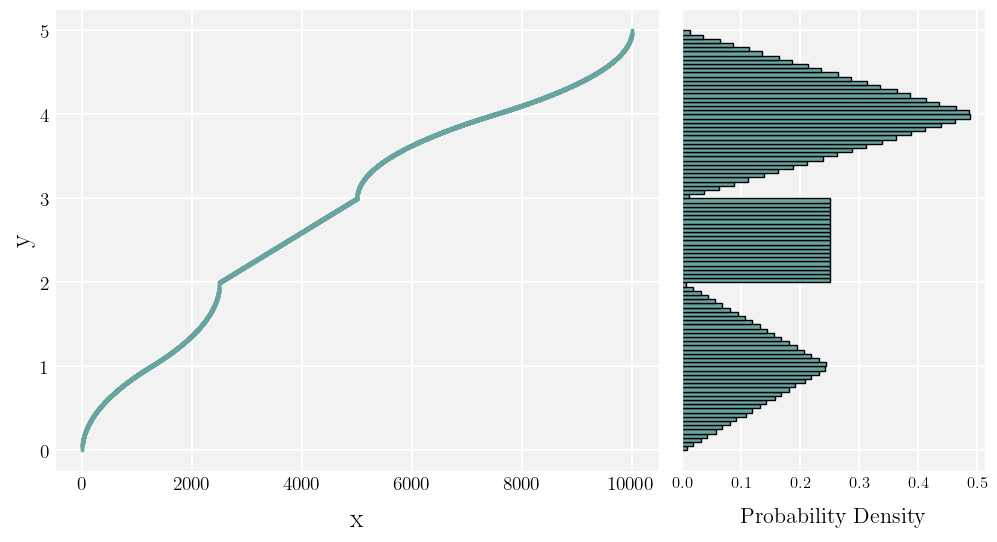

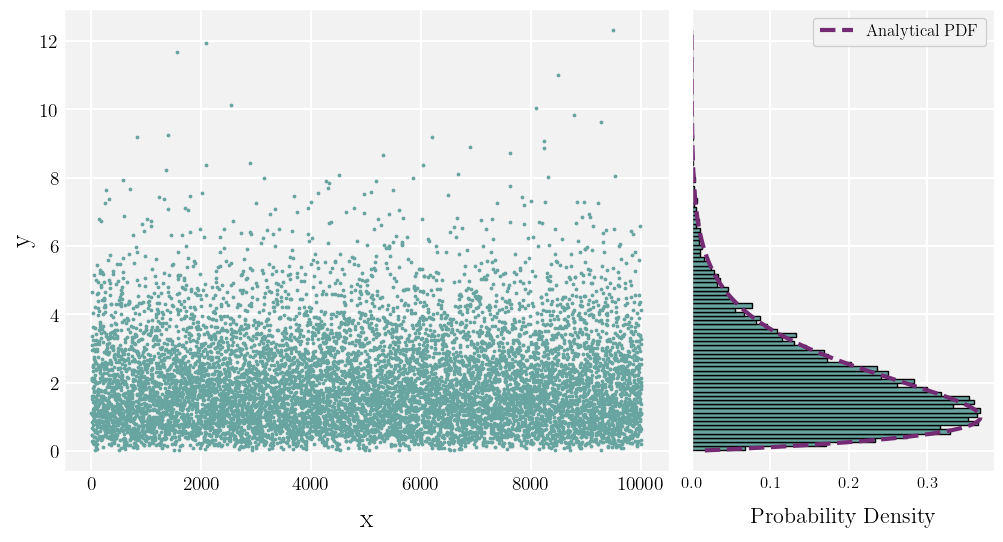

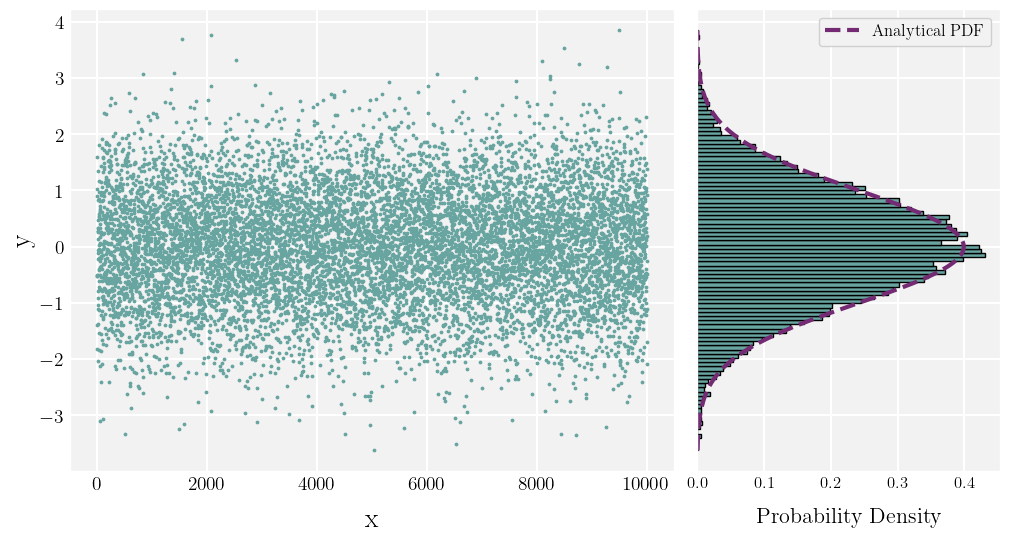

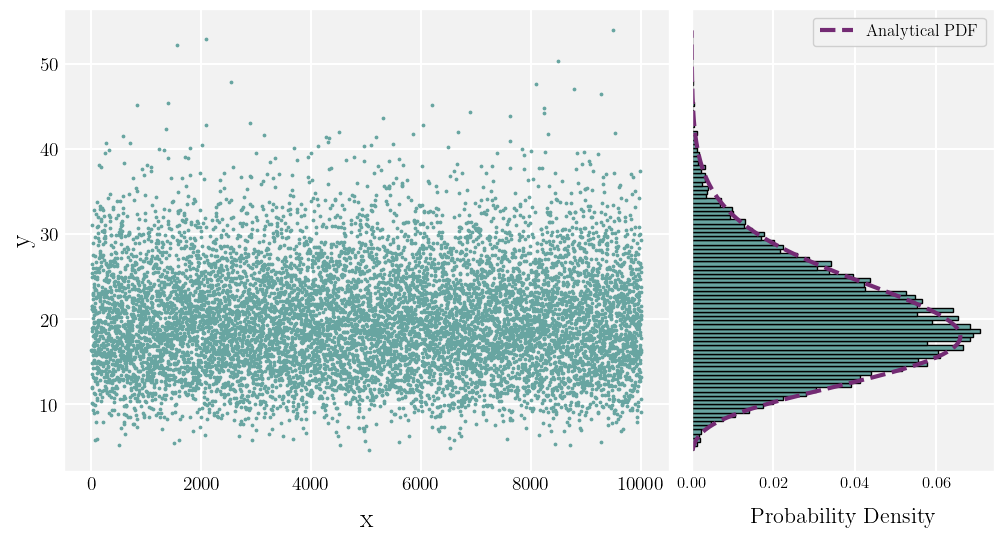

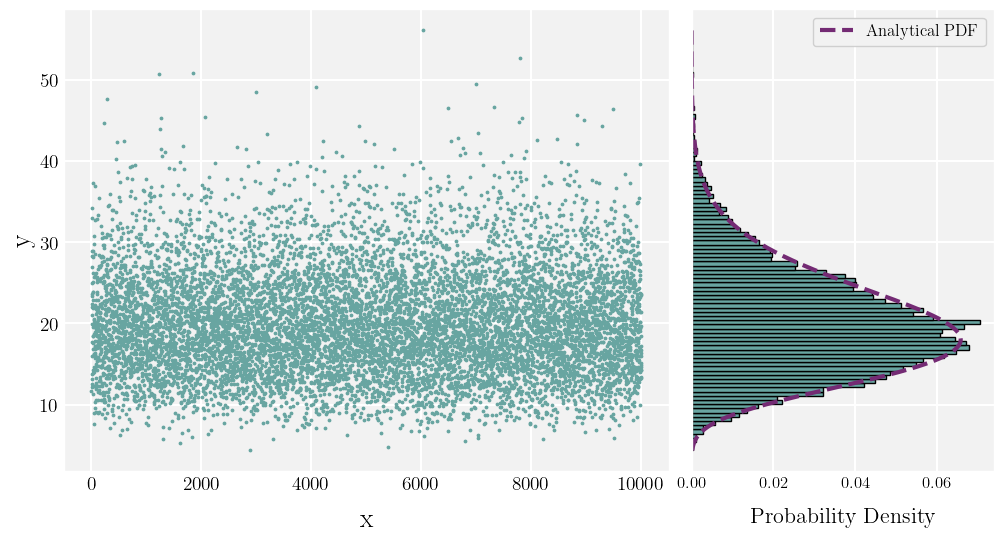

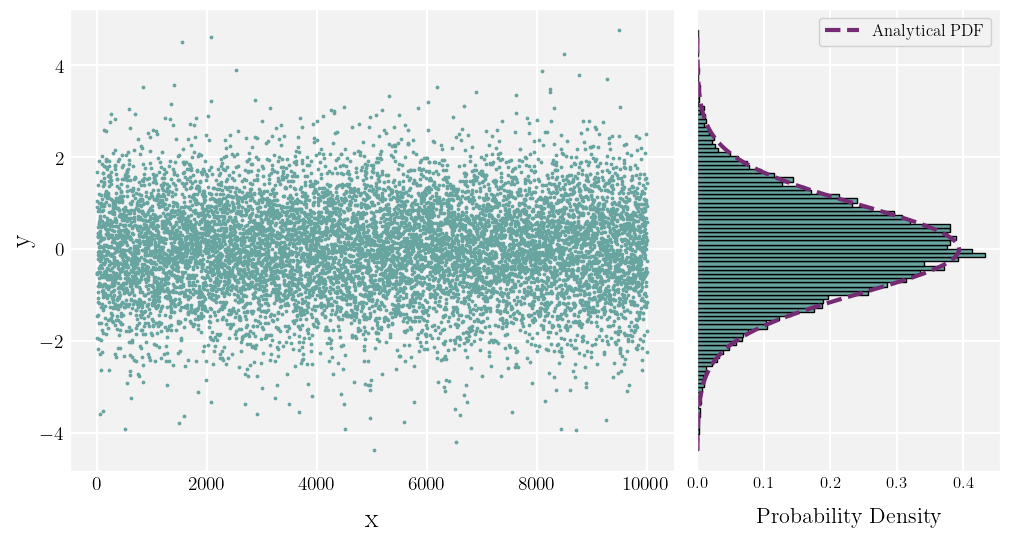

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import gamma, norm, chi2, t

# ======================
# Distribution functions
# ======================

def calc_piecewiseDistribution(u):
    if (u >= 0 and u < (1/8)):
        x = math.sqrt(8*u)
    elif (u >= (1/8) and u < (1/4)):
        x = 2 - math.sqrt(2 - 8*u)
    elif (u >= (1/4) and u < (1/2)):
        x = 1 + 4*u
    elif (u >= (1/2) and u < (3/4)):
        x = 3 + math.sqrt(4*u - 2)
    elif (u >= (3/4) and u <= 1):
        x = 5 - math.sqrt(4 - 4*u)
    return x

def calc_gammaDistribution(u, shape=2.0, scale=1.0):
    return gamma.ppf(u, a=shape, scale=scale)

def calc_gaussianDistribution(u, mu=0.0, sigma=1.0):
    return norm.ppf(u, loc=mu, scale=sigma)

def calc_chiSquaredDistribution(u, df=2):
    return chi2.ppf(u, df)

def calc_chiSquaredDistributionGaussianSum(u, df=2): 
    z_samples = norm.ppf(np.random.uniform(0, 1, size=(df, len(u))))  # df × len(u) matrix of std normals
    chi_squared_samples = np.sum(z_samples**2, axis=0)  # sum over df rows
    return chi_squared_samples

def calc_tDistribution(u, df=2):
    return t.ppf(u, df)

# ======================
# Plotting function with analytical PDF overlay
# ======================

def plot_unordered_with_rotated_histogram(data, bins=100, 
                                        title='Unordered Estimates',
                                        xlabel='Index', ylabel='Value',
                                        pdf_func=None, pdf_params=None):
    """
    Plot a scatter plot of data in original (unordered) sequence, with a rotated histogram beside it.
    Optionally overlays the analytical PDF on the histogram.

    Parameters:
        data: array-like data points
        bins: histogram bins
        title: plot title
        xlabel, ylabel: axis labels
        pdf_func: function that computes PDF, takes x and pdf_params
        pdf_params: dict of parameters to pass to pdf_func
    """

    fig = plt.figure(figsize=(12, 6))
    gs = fig.add_gridspec(1, 2, width_ratios=(4, 2), wspace=0.05)

    # Left: Scatter plot (unordered, by index)
    ax_main = fig.add_subplot(gs[0])
    ax_main.scatter(np.arange(len(data)), data, color='#68A5A1', s=3)
    ax_main.set_xlabel(xlabel, fontsize=20, labelpad=10)
    ax_main.set_ylabel(ylabel, fontsize=20)
    # ax_main.set_title(title, fontsize=26, pad=12)
    ax_main.tick_params(axis='both', labelsize=14)
    ax_main.grid(True)

    # Right: Rotated histogram (density on x, value on y)
    ax_hist = fig.add_subplot(gs[1], sharey=ax_main)
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    bar_width = bin_edges[1] - bin_edges[0]
    ax_hist.barh(bin_centers, hist, height=bar_width, color="#68A5A1", edgecolor='black')
    ax_hist.set_xlabel('Probability Density', fontsize=16, labelpad=12)
    ax_hist.tick_params(axis='x', labelsize=12)
    ax_hist.tick_params(axis='y', left=False, labelleft=False)
    ax_hist.set_xlim(left=0)
    ax_hist.grid(True)

    # Overlay analytical PDF if provided
    if pdf_func is not None:
        y_vals = np.linspace(min(data), max(data), 500)
        pdf_vals = pdf_func(y_vals, **(pdf_params if pdf_params else {}))
        ax_hist.plot(pdf_vals, y_vals, color="#742B74", lw=3, linestyle='--', label='Analytical PDF')  
        ax_hist.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

# ======================
# Generate and plot data for all distributions with PDFs
# ======================

eps = 1e-6
u_values = np.random.uniform(eps, 1 - eps, 10000)

data_piecewise = [calc_piecewiseDistribution(u) for u in np.linspace(0, 1, 10000)]
plot_unordered_with_rotated_histogram(
    data_piecewise,
    title='Piecewise Estimates',
    xlabel='x',
    ylabel='y',
    pdf_func=None
)

# GAMMA
data_gamma = calc_gammaDistribution(u_values, shape=2, scale=1)
plot_unordered_with_rotated_histogram(
    data_gamma,
    title='Gamma Estimates',
    xlabel='x',
    ylabel='y',
    pdf_func=gamma.pdf,
    pdf_params={'a': 2, 'scale': 1}
)

# GAUSSIAN
data_gaussian = calc_gaussianDistribution(u_values, mu=0.0, sigma=1.0)
plot_unordered_with_rotated_histogram(
    data_gaussian,
    # title='Gaussian Estimates',
    xlabel='x',
    ylabel='y',
    pdf_func=norm.pdf,
    pdf_params={'loc': 0, 'scale': 1}
)

# CHI-SQUARED
data_chiSquared = calc_chiSquaredDistribution(u_values, df=20)
plot_unordered_with_rotated_histogram(
    data_chiSquared,
    title='Chi Squared Estimates',
    xlabel='x',
    ylabel='y',
    pdf_func=chi2.pdf,
    pdf_params={'df': 20}
)

# CHI SQUARED - BY SUM OF GAUSSIANS
data_chiSquared_bySum = calc_chiSquaredDistributionGaussianSum(u_values, df=20)
plot_unordered_with_rotated_histogram(
    data_chiSquared_bySum,
    title='Chi Squared (Sum of Gaussians) Estimates',
    xlabel='x',
    ylabel='y',
    pdf_func=chi2.pdf,
    pdf_params={'df': 20}
)

# T-DISTRIBUTION
data_t = calc_tDistribution(u_values, df=20)
plot_unordered_with_rotated_histogram(
    data_t,
    title='t-Distribution Estimates',
    xlabel='x',
    ylabel='y',
    pdf_func=t.pdf,
    pdf_params={'df': 20}
)



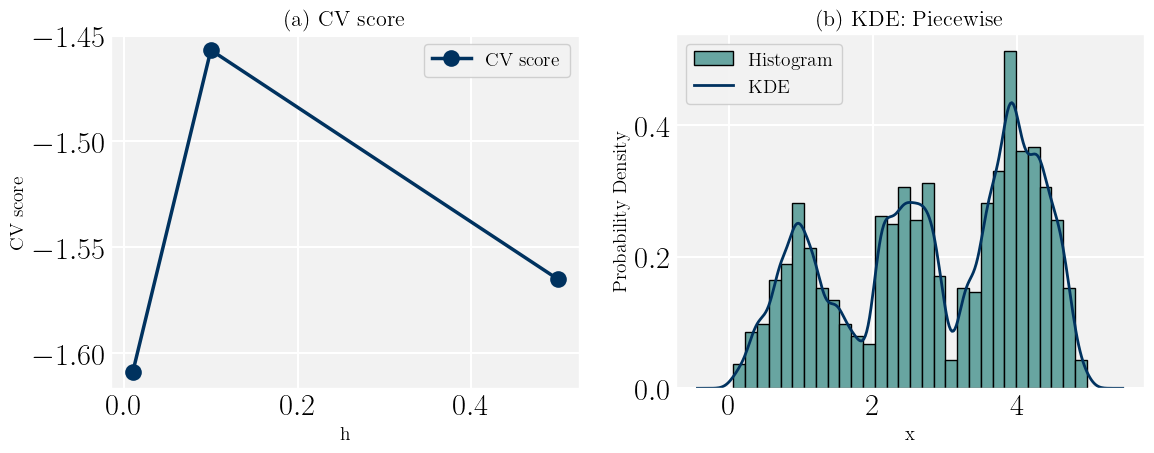

/var/folders/y5/q6z5mfgj6_g9z2bwg0jy91km0000gp/T/ipykernel_33191/2534039707.py:22: RuntimeWarning: divide by zero encountered in log
  s[j-1, i] = np.mean(np.log(np.mean(P[mask][:, test_mask], axis=0)))


MAE between KDE and analytical PDF for Gamma: 0.010849


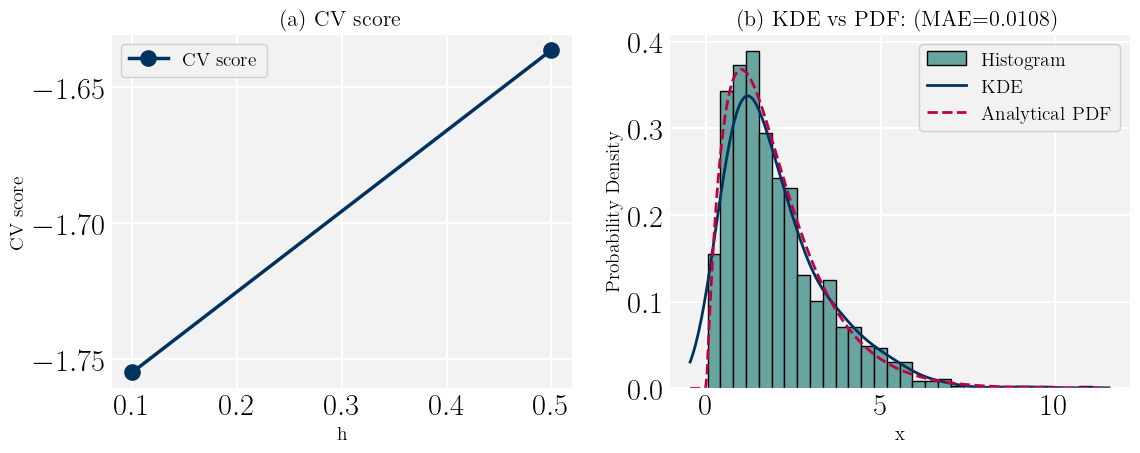

MAE between KDE and analytical PDF for Gaussian: 0.015503


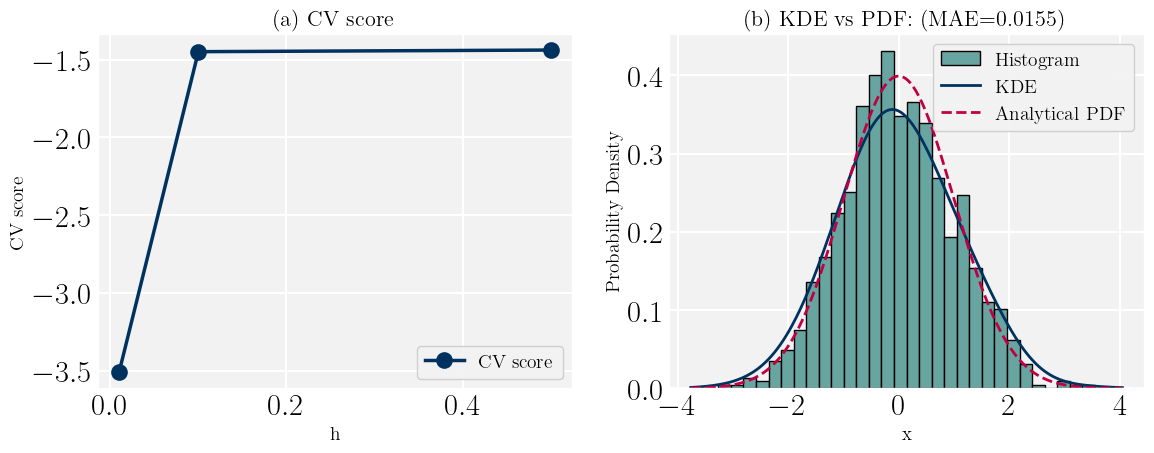

/var/folders/y5/q6z5mfgj6_g9z2bwg0jy91km0000gp/T/ipykernel_33191/2534039707.py:22: RuntimeWarning: divide by zero encountered in log
  s[j-1, i] = np.mean(np.log(np.mean(P[mask][:, test_mask], axis=0)))


MAE between KDE and analytical PDF for Chi-Squared: 0.002912


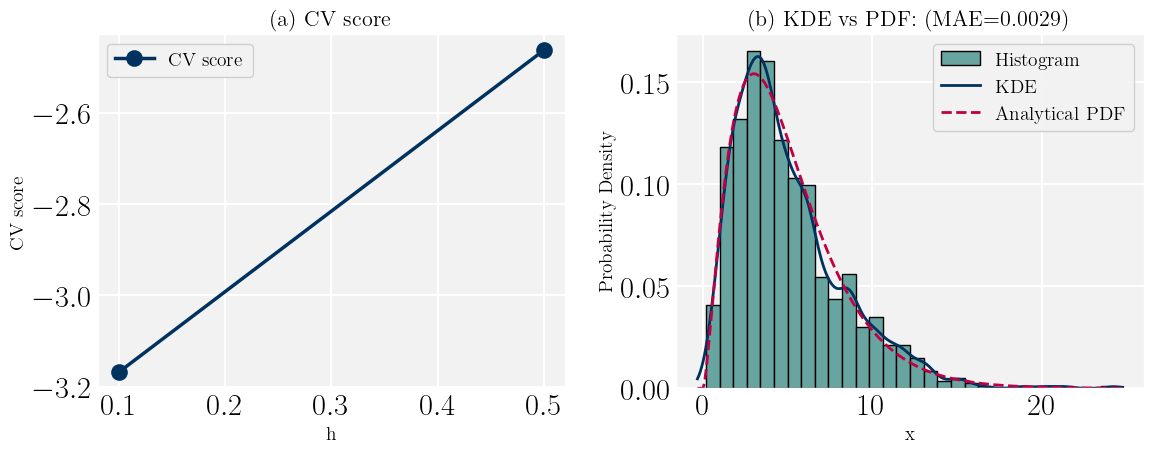

/var/folders/y5/q6z5mfgj6_g9z2bwg0jy91km0000gp/T/ipykernel_33191/2534039707.py:22: RuntimeWarning: divide by zero encountered in log
  s[j-1, i] = np.mean(np.log(np.mean(P[mask][:, test_mask], axis=0)))


MAE between KDE and analytical PDF for t-distribution: 0.013181


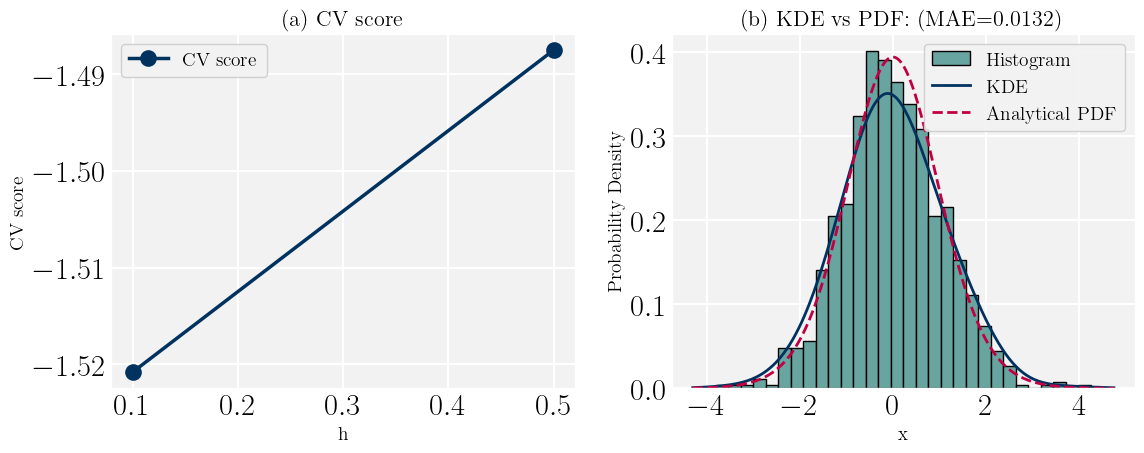

In [14]:
# --- Sample generator
def generate_samples(calc_func, n=600, seed=0, **kwargs):
    np.random.seed(seed)
    u_samples = np.random.rand(n)
    return np.array([calc_func(u, **kwargs) for u in u_samples])

# --- KDE cross-validation
def kde_crossval(x, hs=np.array([0.01, 0.1, 0.5]), t=5):
    n = len(x)
    x2 = x**2
    d2 = np.tile(x2, (n, 1)) + np.tile(x2[:, np.newaxis], (1, n)) - 2 * np.outer(x, x)
    v = np.mod(np.random.permutation(n), t) + 1
    s = np.zeros((t, len(hs)))

    for i, h in enumerate(hs):
        hh = 2 * h**2
        P = np.exp(-d2 / hh) / np.sqrt(np.pi * hh)
        
        for j in range(1, t + 1):
            mask = (v != j) # 4 folds for training
            test_mask = (v == j) # one fold for testing
            s[j-1, i] = np.mean(np.log(np.mean(P[mask][:, test_mask], axis=0)))

    mean_scores = np.mean(s, axis=0)
    best_idx = np.argmax(mean_scores)
    h_opt = hs[best_idx]
    return h_opt, mean_scores

# --- KDE estimate and plot
def plot_kde_and_cv(x, h_opt, mean_scores, hs, pdf_func=None, pdf_kwargs=None, title=''):
    n = len(x)
    kde = gaussian_kde(x, bw_method=h_opt / np.std(x, ddof=1))
    x_vals = np.linspace(min(x) - 0.5, max(x) + 0.5, 300)

    plt.figure(figsize=(12, 5))

    # (a) CV score plot
    plt.subplot(1, 2, 1)
    plt.plot(hs, mean_scores, '-o', label='CV score')
    plt.xlabel('h', fontsize=14)
    plt.ylabel('CV score', fontsize=14)
    plt.title('(a) CV score', fontsize=16)
    plt.legend(fontsize=14)

    # (b) KDE and analytical PDF
    plt.subplot(1, 2, 2)
    plt.hist(x, bins=30, edgecolor='black', label='Histogram', color="#68A5A1", density=True)
    kde_vals = kde(x_vals)
    plt.plot(x_vals, kde_vals, linewidth=2, label='KDE')

    if pdf_func is not None:
        if pdf_kwargs is None:
            pdf_kwargs = {}
        pdf_vals = pdf_func(x_vals, **pdf_kwargs)
        plt.plot(x_vals, pdf_vals, '--', linewidth=2, label='Analytical PDF')

        # Compute MAE - calculate the mean distance (euclidian) between the analytical PDF and KDE PDF
        mae = np.mean(np.abs(kde_vals - pdf_vals))
        print(f"MAE between KDE and analytical PDF for {title}: {mae:.6f}")
        plt.title(f'(b) KDE vs PDF: (MAE={mae:.4f})', fontsize=16)
    else:
        plt.title(f'(b) KDE: {title}', fontsize=16)

    plt.xlabel('x', fontsize=14)
    plt.ylabel('Probability Density', fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()


# --- Wrapper to run full analysis
def run_kde_analysis(calc_distribution, dist_name='', **kwargs):
    n = 1000
    np.random.seed(0)
    u_samples = np.random.rand(n)
    x = np.array([calc_distribution(u, **kwargs) for u in u_samples])

    # Use modular CV function
    h_opt, mean_scores = kde_crossval(x)
    hs = np.array([0.01, 0.1, 0.5])  # Must match kde_crossval if overridden

    # Define analytical PDF
    if dist_name.lower() == 'gamma':
        pdf_func = gamma.pdf
        pdf_kwargs = {'a': kwargs.get('shape', 2.0), 'scale': kwargs.get('scale', 1.0)}
    elif dist_name.lower() == 'gaussian':
        pdf_func = norm.pdf
        pdf_kwargs = {'loc': kwargs.get('mu', 0.0), 'scale': kwargs.get('sigma', 1.0)}
    elif dist_name.lower() == 'chi-squared':
        pdf_func = chi2.pdf
        pdf_kwargs = {'df': kwargs.get('df', 2)}
    elif dist_name.lower() == 't-distribution':
        pdf_func = t.pdf
        pdf_kwargs = {
            'df': kwargs.get('df', 2),
            'loc': kwargs.get('loc', 0.0),
            'scale': kwargs.get('scale', 1.0)
        }
    else:
        pdf_func = None
        pdf_kwargs = None

    plot_kde_and_cv(x, h_opt, mean_scores, hs, pdf_func=pdf_func, pdf_kwargs=pdf_kwargs, title=dist_name)

# Call functions
run_kde_analysis(calc_piecewiseDistribution, dist_name='Piecewise')
run_kde_analysis(calc_gammaDistribution, dist_name='Gamma', shape=2.0, scale=1.0)
run_kde_analysis(calc_gaussianDistribution, dist_name='Gaussian', mu=0.0, sigma=1.0)
run_kde_analysis(calc_chiSquaredDistribution, dist_name='Chi-Squared', df=5)
run_kde_analysis(calc_tDistribution, dist_name='t-distribution', df=20)

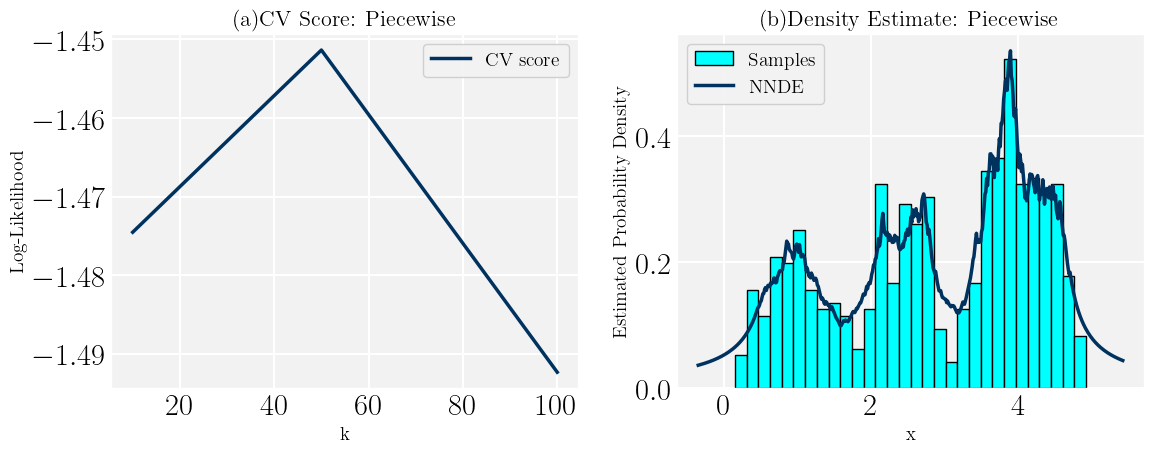

MAE between NNDE and analytical PDF for Gamma: 0.018666


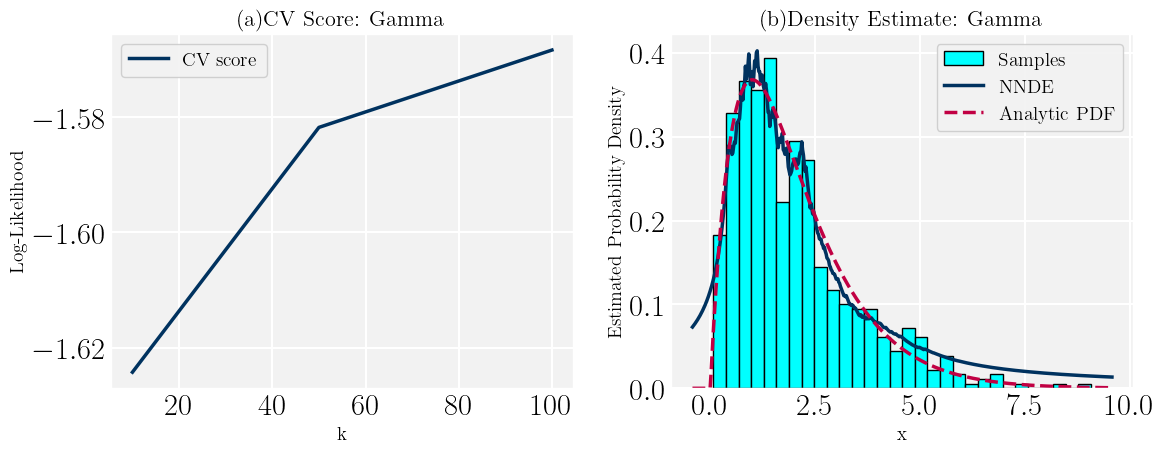

MAE between NNDE and analytical PDF for Gaussian: 0.026952


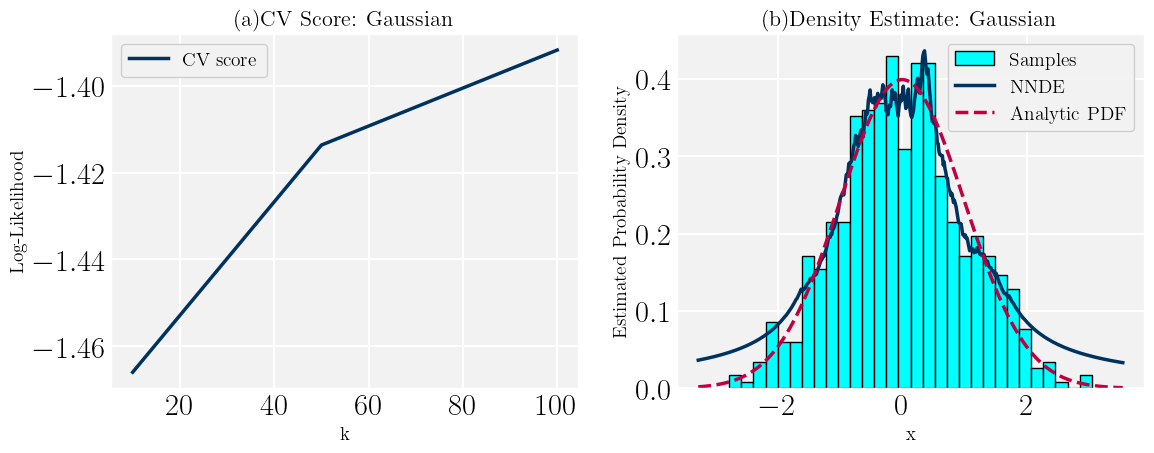

MAE between NNDE and analytical PDF for Chi-Squared: 0.015508


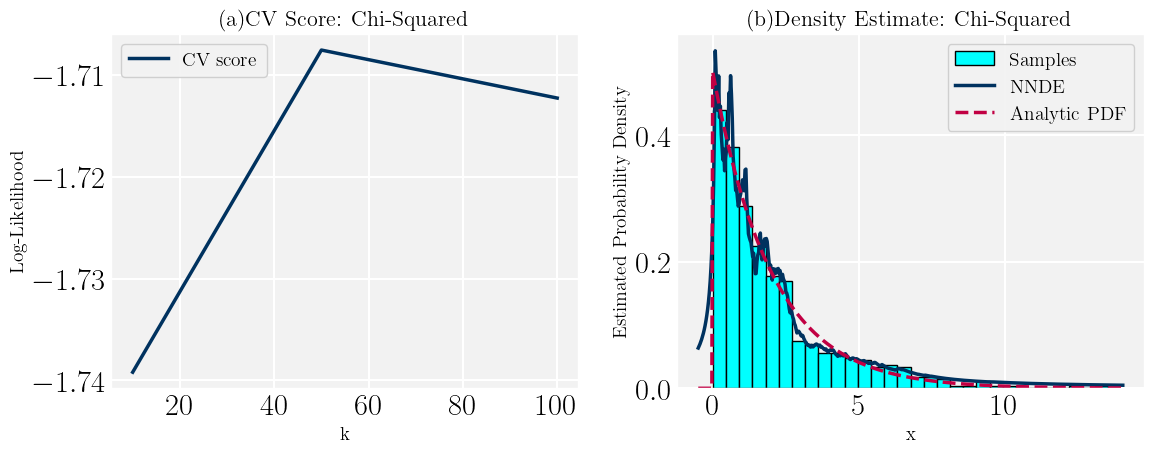

MAE between NNDE and analytical PDF for t-Distribution: 0.025438


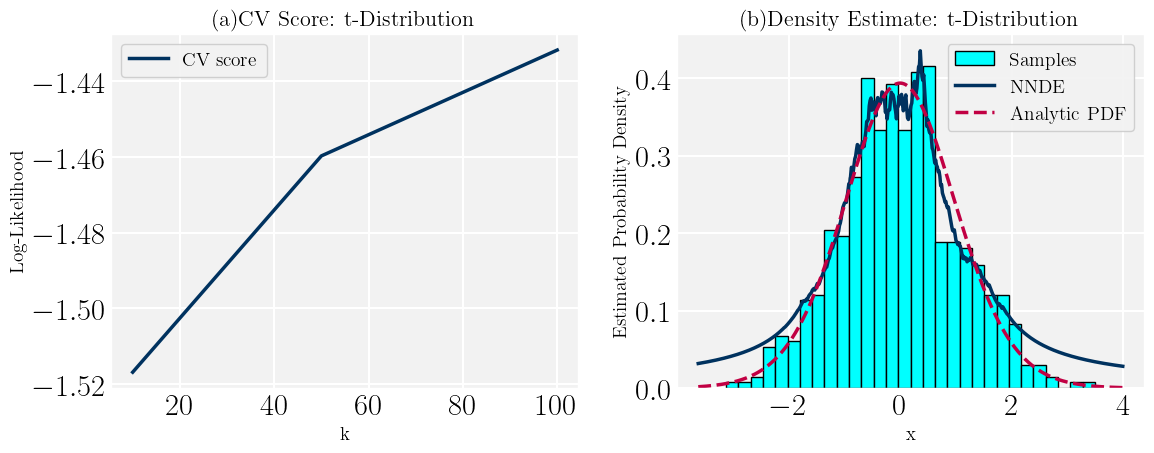

In [5]:
# Analytical PDFs for plotting
def pdf_gamma(x, shape=2.0, scale=1.0):
    return gamma.pdf(x, a=shape, scale=scale)

def pdf_gaussian(x, mu=0.0, sigma=1.0):
    return norm.pdf(x, loc=mu, scale=sigma)

def pdf_chiSquared(x, df=2):
    return chi2.pdf(x, df=df)

def pdf_tDistribution(x, df=20):
    return t.pdf(x, df)

# NNDE with cross-validation and plotting function
def run_nn_density_estimation(calc_func, pdf_func=None, dist_name='', n=600, ks=[10, 50, 100], **kwargs):
    np.random.seed(0)
    u_samples = np.random.rand(n)
    x = np.array([calc_func(u, **kwargs) for u in u_samples])

    x2 = x**2
    t = 5
    g_const = math.gamma(3/2)

    d2 = np.add.outer(x2, x2) - 2 * np.outer(x, x)
    v = np.mod(np.random.permutation(n), t) + 1

    s = np.zeros((t, len(ks)))

    for j in range(1, t + 1):
        mask_train = v != j
        mask_val = v == j
        S = np.sort(d2[np.ix_(mask_train, mask_val)], axis=0)

        for i, k in enumerate(ks):
            r = np.sqrt(S[k, :])
            score = (k * g_const) / (np.sum(mask_train) * np.sqrt(np.pi) * r)
            s[j - 1, i] = np.mean(np.log(score)) # mean log likelihood to calculate the score

    cv_scores = np.mean(s, axis=0)
    best_idx = np.argmax(cv_scores)
    k_opt = ks[best_idx]

    # Estimate NNDE density on evaluation points
    m = 500
    X = np.linspace(min(x) - 0.5, max(x) + 0.5, m)
    X2 = X**2
    D2 = np.add.outer(x2, X2) - 2 * np.outer(x, X)
    S = np.sort(D2, axis=0)
    r = np.sqrt(S[k_opt, :])
    Ph = k_opt * g_const / (n * np.sqrt(np.pi) * r)

    # --- MAE calculation if analytic PDF is available ---
    if pdf_func is not None:
        pdf_vals = pdf_func(X, **kwargs)
        mae = np.mean(np.abs(Ph - pdf_vals))
        print(f"MAE between NNDE and analytical PDF for {dist_name}: {mae:.6f}")

    # Plot
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # (a) CV score
    axs[0].plot(ks, cv_scores, label='CV score')
    axs[0].set_xlabel('k', fontsize=14)
    axs[0].set_ylabel('Log-Likelihood', fontsize=14)
    axs[0].set_title(f'(a)CV Score: {dist_name}', fontsize=16)
    axs[0].grid(True)
    axs[0].legend(fontsize=14)
    axs[0].plot(ks[best_idx], cv_scores[best_idx], mfc='none', mec='b', mew=2)

    # (b) Density estimate + analytic PDF if available
    axs[1].hist(x, bins=30, color='cyan', edgecolor='k', label='Samples', density=True)
    axs[1].plot(X, Ph, label='NNDE')
    if pdf_func is not None:
        axs[1].plot(X, pdf_vals, '--', label='Analytic PDF')
    axs[1].set_xlabel('x', fontsize=14)
    axs[1].set_ylabel('Estimated Probability Density', fontsize=14)
    axs[1].set_title(f'(b)Density Estimate: {dist_name}', fontsize=16)
    axs[1].legend(fontsize=14)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


# Call functions with all distributions
run_nn_density_estimation(calc_piecewiseDistribution, pdf_func=None, dist_name='Piecewise')
run_nn_density_estimation(calc_gammaDistribution, pdf_func=pdf_gamma, dist_name='Gamma', shape=2.0, scale=1.0)
run_nn_density_estimation(calc_gaussianDistribution, pdf_func=pdf_gaussian, dist_name='Gaussian', mu=0.0, sigma=1.0)
run_nn_density_estimation(calc_chiSquaredDistribution, pdf_func=pdf_chiSquared, dist_name='Chi-Squared', df=2)
run_nn_density_estimation(calc_tDistribution, pdf_func=pdf_tDistribution, dist_name='t-Distribution', df=20)

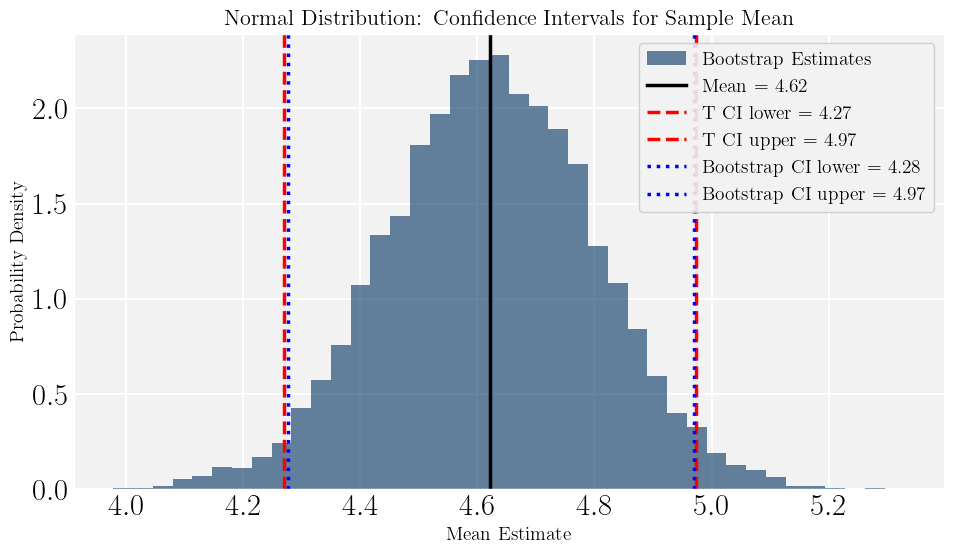

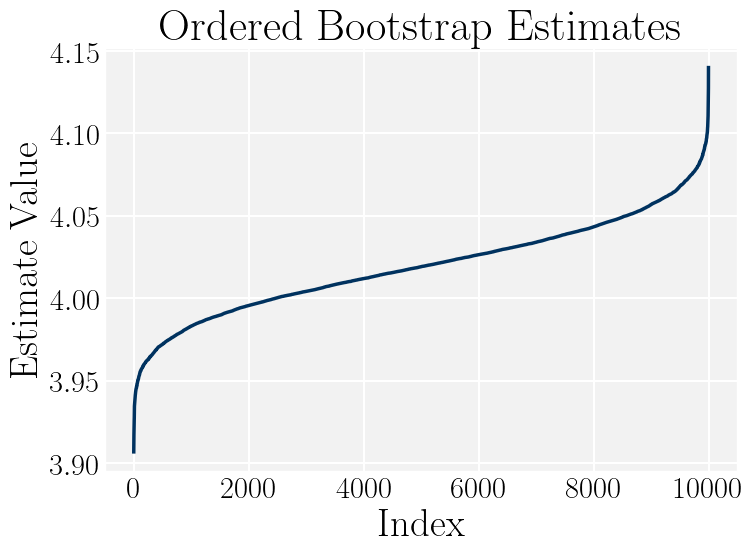

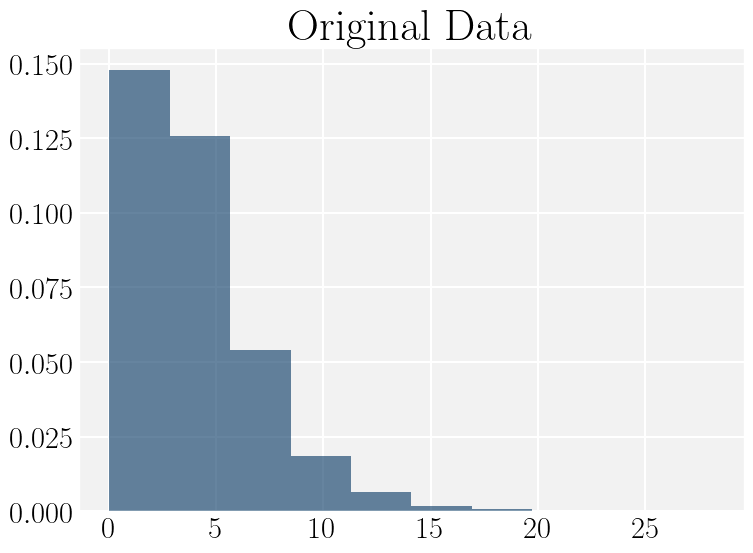

The mean is 4.0 and the standard deviation is 0.0283
The mean from bootstrap sampling is 4.019563375603535 and the standard deviation from bootstrap sampling is -0.0566836111413771

2.5th estimate 3.963
97.5th estimate 4.077


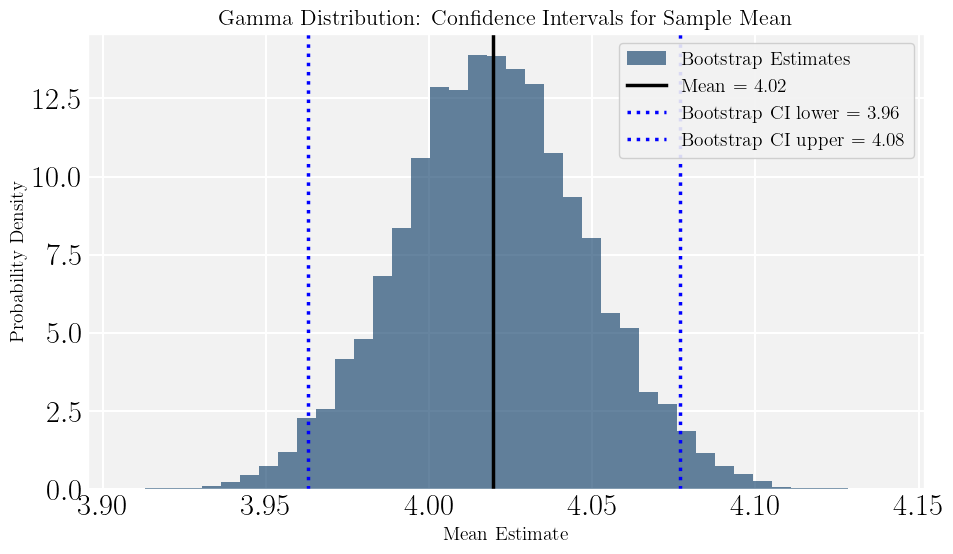

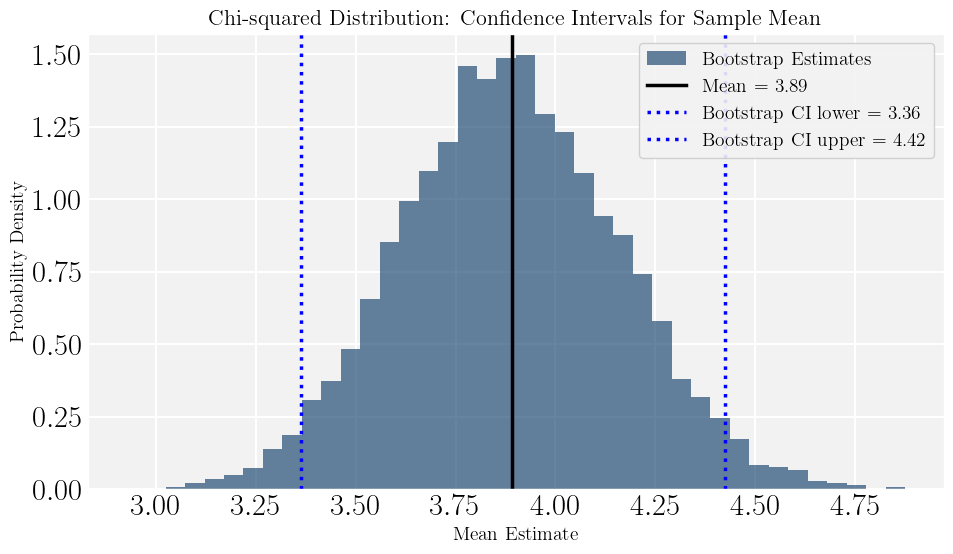

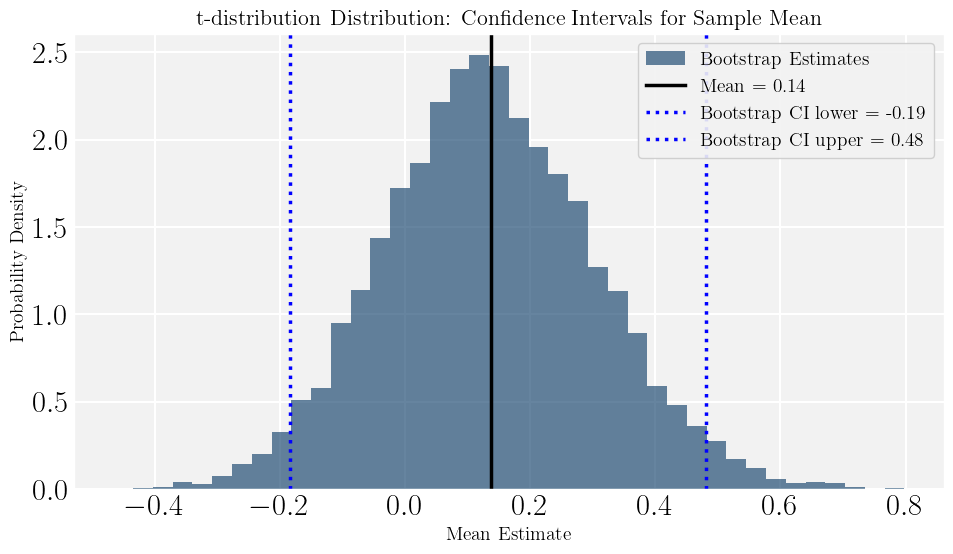

In [6]:
# Confidence Intervals - the frequentist approach, for a 95% confidence interval we are basically say if we do 100 trials then calculate the interval, and apply to each trial, we expect 95 of those intervals to contain the true fixed parameter

# Function to generate i.i.d. samples
def generate_sample(dist='normal', n=10000, **kwargs):
    if dist == 'normal':
        return np.random.normal(loc=kwargs.get('mu', 0), scale=kwargs.get('sigma', 1), size=n)
    elif dist == 'gamma':
        return np.random.gamma(shape=kwargs.get('shape', 2), scale=kwargs.get('scale', 1), size=n)
    elif dist == 'chisquare':
        return np.random.chisquare(df=kwargs.get('df', 2), size=n)
    elif dist == 't':
        return np.random.standard_t(df=kwargs.get('df', 2), size=n)
    else:
        raise ValueError("Unsupported distribution")

# Classical CI using Student's t-distribution - for normal only
def t_confidence_interval(data, alpha=0.05):
    n = len(data)
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    stderr = sigma_hat / np.sqrt(n)
    t_crit = stats.t.ppf(1 - alpha / 2, df=n - 1)
    return mu_hat - t_crit * stderr, mu_hat + t_crit * stderr

# Bootstrap confidence interval - for any distribution
def bootstrap_confidence_interval(data, alpha=0.05, n_bootstrap=10000, stat_func=np.mean):
    n = len(data)
    boot_estimates = np.array([
        stat_func(np.random.choice(data, size=n, replace=True))
        for _ in range(n_bootstrap)
    ])
    lower = np.percentile(boot_estimates, 100 * alpha / 2)
    upper = np.percentile(boot_estimates, 100 * (1 - alpha / 2))
    return lower, upper, boot_estimates

# Plotting function
def plot_confidence_intervals(data, ci_t, ci_boot, boot_estimates, dist_name='Normal'):
    mu_hat = np.mean(data)

    plt.figure(figsize=(10, 6))
    plt.hist(boot_estimates, bins=40, density=True, alpha=0.6, label='Bootstrap Estimates')

    plt.axvline(mu_hat, color='black', label=f'Mean = {mu_hat:.2f}')
    
    if ci_t: # only for normal distribution 
        plt.axvline(ci_t[0], color='red', linestyle='--', label=f'T CI lower = {ci_t[0]:.2f}')
        plt.axvline(ci_t[1], color='red', linestyle='--', label=f'T CI upper = {ci_t[1]:.2f}')
    
    # all other distributions
    plt.axvline(ci_boot[0], color='blue', linestyle=':', label=f'Bootstrap CI lower = {ci_boot[0]:.2f}')
    plt.axvline(ci_boot[1], color='blue', linestyle=':', label=f'Bootstrap CI upper = {ci_boot[1]:.2f}')

    plt.title(f"{dist_name} Distribution: Confidence Intervals for Sample Mean", fontsize=16)
    plt.xlabel("Mean Estimate", fontsize=14)
    plt.ylabel("Probability Density", fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# NORMAL DISTRIBUTION 
data_normal = generate_sample('normal', n=100, mu=5.0, sigma=2.0)
ci_t = t_confidence_interval(data_normal)
ci_lower, ci_upper, boot_estimates = bootstrap_confidence_interval(data_normal)
ci_boot = (ci_lower, ci_upper)
plot_confidence_intervals(data_normal, ci_t, ci_boot, boot_estimates, dist_name='Normal')

# GAMMA DISTRIBUTION
shape = 2.0 # alpha - shape
scale = 2.0 # theta - scale
n = 10000
data_gamma = generate_sample('gamma', n=n, shape=shape, scale=scale)
ci_lower, ci_upper, boot_estimates = bootstrap_confidence_interval(data_gamma)
sorted_estimates = np.sort(boot_estimates)

# plot ordered bootstrap data estimates
plt.plot(sorted_estimates)
plt.title("Ordered Bootstrap Estimates")
plt.xlabel("Index")
plt.ylabel("Estimate Value")
plt.grid(True)
plt.show()

# plot original data histogram
plt.hist(data_gamma, bins=10, density=True, alpha=0.6)
plt.title('Original Data')
plt.show()

# calculate actual variance and mean
theoreticalMean = shape * scale
variance = shape * scale**2
theoreticalSTD = round(variance**(1/2) / (n**(1/2)), 4)
print(f'The mean is {theoreticalMean} and the standard deviation is {theoreticalSTD}')
print(f'The mean from bootstrap sampling is {np.mean(data_gamma)} and the standard deviation from bootstrap sampling is {ci_lower - np.mean(data_gamma)}\n')

# Plot the sorted estimates
n = int(0.025*len(boot_estimates)) # the CI interval has significance level 5% across both tails which is the same as the 2.5th and 97.5th estimates
m = int(0.975*len(boot_estimates))
print(f'2.5th estimate {round(sorted_estimates[n], 3)}')
print(f'97.5th estimate {round(sorted_estimates[m], 3)}')

ci_boot = (ci_lower, ci_upper)
plot_confidence_intervals(data_gamma, ci_t=None, ci_boot=ci_boot, boot_estimates=boot_estimates, dist_name='Gamma')


# CHI SQUARED DISTRIBUTION
data_chiSquared = generate_sample('chisquare', n=100, df=4)
ci_lower, ci_upper, boot_estimates = bootstrap_confidence_interval(data_chiSquared)
ci_boot = (ci_lower, ci_upper)
plot_confidence_intervals(data_chiSquared, ci_t=None, ci_boot=ci_boot, boot_estimates=boot_estimates, dist_name='Chi-squared')

# T DISTRIBUTION
data_t = generate_sample('t', n=100, df=4)
ci_lower, ci_upper, boot_estimates = bootstrap_confidence_interval(data_t)
ci_boot = (ci_lower, ci_upper)
plot_confidence_intervals(data_t, ci_t=None, ci_boot=ci_boot, boot_estimates=boot_estimates, dist_name='t-distribution')

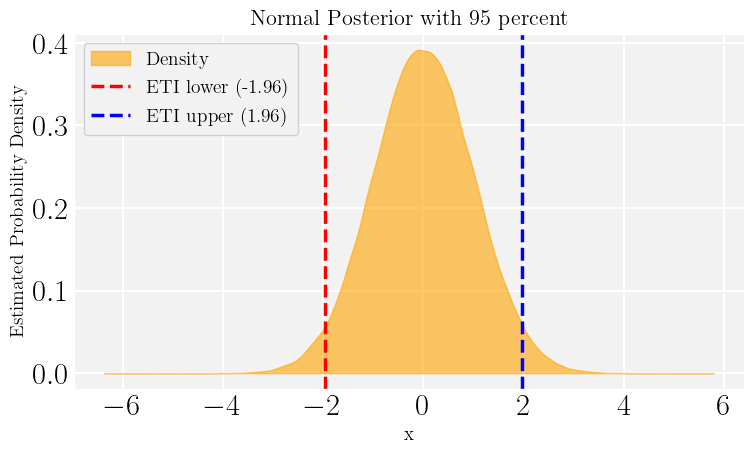

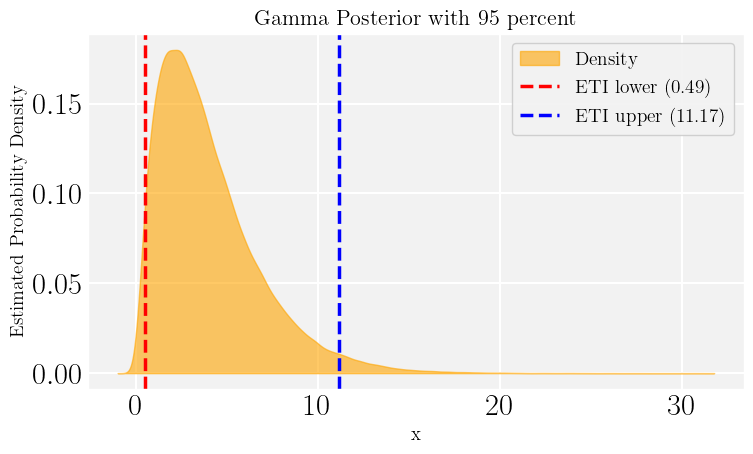

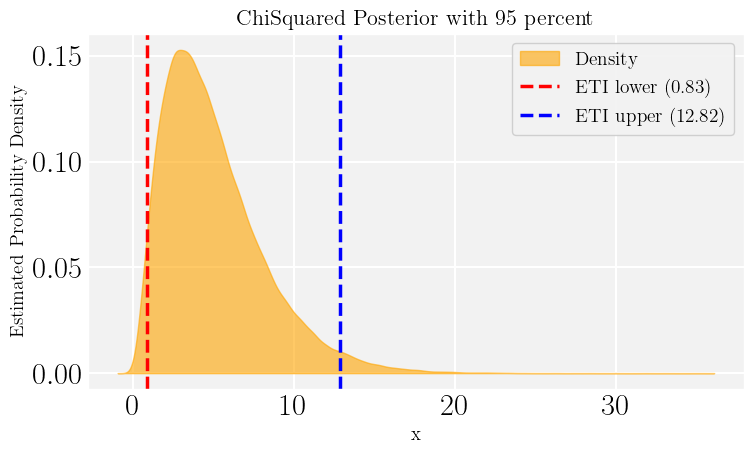

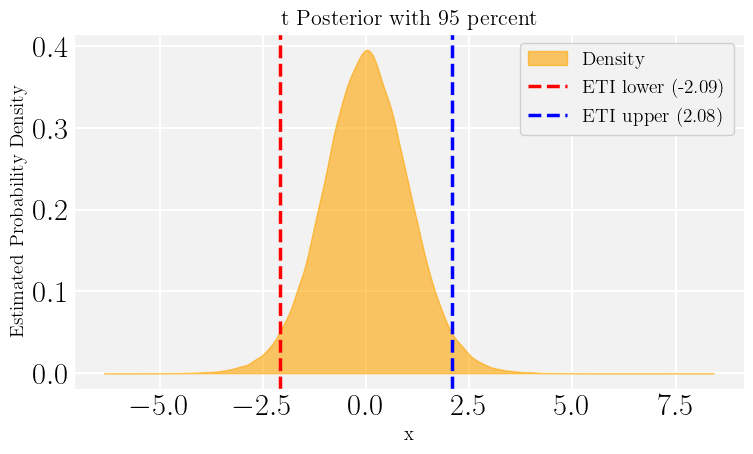

In [7]:
# credible intervals - ie the 95% credible interval is simply the central portion of the posterior distribution that contains 95% of the values.

# Function to compute equal-tailed interval (ETI) - the tails are 2.5% each
def compute_eti(data, ci=0.95):
    lowerBound = np.percentile(data, (1 - ci) / 2 * 100)
    upperBound = np.percentile(data, (1 + ci) / 2 * 100) 
    return lowerBound, upperBound

# Function to generate posterior samples
def generate_posterior(dist_name, size=150000, **kwargs): # **kwargs passes the distribution specific parameters
    if dist_name == 'Normal':
        return np.random.normal(loc=kwargs.get('mu', 0), scale=kwargs.get('sigma', 1), size=size)
    elif dist_name == 'Gamma':
        return np.random.gamma(shape=kwargs.get('shape', 2.0), scale=kwargs.get('scale', 1.0), size=size)
    elif dist_name == 'ChiSquared':
        return np.random.chisquare(df=kwargs.get('df', 2), size=size)
    elif dist_name == 't':
        return np.random.standard_t(df=kwargs.get('df', 20), size=size)
    else:
        raise ValueError("Unsupported distribution")

# Function to plot posterior with ETI
def plot_posterior_with_eti(posterior, dist_name, ci=0.95):
    # Compute ETI
    ci_low, ci_high = compute_eti(posterior, ci=ci)

    # Estimate density
    density = stats.gaussian_kde(posterior)
    x = np.linspace(min(posterior) - 1, max(posterior) + 1, 1000)
    y = density(x)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.fill_between(x, y, color='orange', alpha=0.6, label='Density')
    plt.axvline(ci_low, color='red', linestyle='--', label=f'ETI lower ({ci_low:.2f})')
    plt.axvline(ci_high, color='blue', linestyle='--', label=f'ETI upper ({ci_high:.2f})')
    plt.title(f"{dist_name} Posterior with {int(ci*100)} percent", fontsize=16)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("Estimated Probability Density", fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Apply to distributions
for dist_name, params in [
    ('Normal', {'mu': 0, 'sigma': 1}),
    ('Gamma', {'shape': 2.0, 'scale': 2.0}),
    ('ChiSquared', {'df': 5}),
    ('t', {'df': 20})
]:
    posterior = generate_posterior(dist_name, **params)
    plot_posterior_with_eti(posterior, dist_name)



In [8]:
# Type 1 and Type 2 errors - calculations through repeated samples

from scipy.stats import ttest_1samp

# Parameters
mu_null = 0            # Null hypothesis mean
mu_alt = 0.5           # Alternative mean
std_dev = 5
n = 30                 # Sample size
alpha = 0.05
num_simulations = 10000

# initialise for later
type_1_errors, type_2_errors = 0, 0

# Type I error: simulate under H0
for _ in range(num_simulations):
    sample = np.random.normal(mu_null, std_dev, n)
    t_stat, p_val = ttest_1samp(sample, mu_null)
    if p_val < alpha:
        type_1_errors += 1

# Type II error: simulate under H1
for _ in range(num_simulations):
    sample = np.random.normal(mu_alt, std_dev, n)
    t_stat, p_val = ttest_1samp(sample, mu_null)
    if p_val >= alpha:
        type_2_errors += 1

print(f"Estimated Type I Error Rate: {type_1_errors / num_simulations:.3f}")
print(f"Estimated Type II Error Rate: {type_2_errors / num_simulations:.3f}")


Estimated Type I Error Rate: 0.050
Estimated Type II Error Rate: 0.918


The calculated p-value is 0.7369


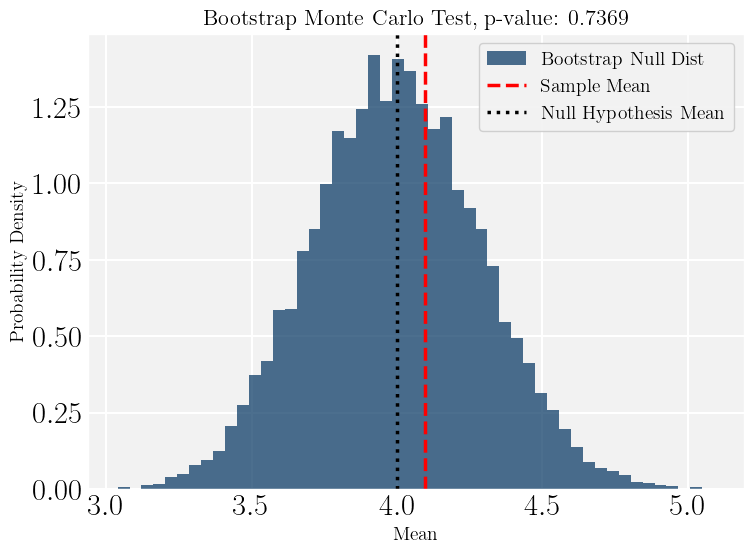

In [9]:
# Parameters for the Gamma distribution
shape = 2.0   # shape parameter, alpha
scale = 2.0   # scale parameter, theta

# Generate data using a gamma distribution
np.random.seed(0)
sample_size = 100  
sampleData = np.random.gamma(shape, scale, size=sample_size)

# Null hypothesis: mean is equal to mu_0
mu_0 = 4.0
sample_mean = np.mean(sampleData)

# Shift original data to centre it under H0 - so it is what we expect under the null hypothesis
centredData = sampleData - sample_mean + mu_0

# Bootstrap resampling from the centered data
num_bootstrap = 10000
bootstrap_means = []
for _ in range(num_bootstrap):
    resample = np.random.choice(centredData, size=len(centredData), replace=True)
    bootstrap_means.append(np.mean(resample))

bootstrap_means = np.array(bootstrap_means)

# Compute p-value: two-sided test
p_val = np.mean(np.abs(bootstrap_means - mu_0) >= np.abs(sample_mean - mu_0))
print(f'The calculated p-value is {p_val}')

# Plot
plt.hist(bootstrap_means, bins=50, density=True, alpha=0.7, label='Bootstrap Null Dist')
plt.axvline(sample_mean, color='red', linestyle='--', label='Sample Mean')
plt.axvline(mu_0, color='black', linestyle=':', label='Null Hypothesis Mean')
plt.legend(fontsize=14)
plt.title(f"Bootstrap Monte Carlo Test, p-value: {p_val:.4f}", fontsize=16)
plt.xlabel('Mean', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.show()